
# Report: Impact of Early School Leaving on the Unemployment and Criminality Rates in the Federal States of Germany in 2022


## Contents:

1. Introduction
2. Data Sources
3. Installation of dependencies
4. Data Load
5. Analysis and Results 
6. Conclusion

## 1. Introduction

Early school leaving has been a significant concern in numerous countries around the world, given its 
detrimental impact not only on the individuals discontinuing their education but also on the society as a 
whole. 
In this project, focused basically on Germany, two paramount issues related to the early school leaving 
are addressed: the unemployment rate and crime statistics, which stand out as crucial challenges within the context of societal dynamics. 
Within the scope of this project, the following key questions are explored:

**Is there a correlation between early school leaving rates and crime rates among young demographics in specific federal states in 2022?**

**Are there noticeable correlations between unemployment rates and early school leaving rates across different federal states and years (especially in 2022)?**

 
## 2. Data Sources  

This project uses open source data as follows:    
Data source 1: Unemployed: Federal states, years, gender   
Metadata URL: https://data.europa.eu/data/datasets?locale=de  
Data URL: https://www-genesis.destatis.de/genesis/downloads/00/tables/13211-0009_00.csv  
Data Type: CSV Data  
Procured from the Statistisches Bundesamt, the official dataset meticulously delineates unemployment figures categorized by federal states and gender from 1991 to 2022.

Data source 2.1: Early school leavers by federal state  
Metadata URL: https://www.govdata.de/web/guest/suchen/-/searchresult/q/bundesland/s/relevance_desc  
Data URL 1: https://www.govdata.de/web/guest/suchen/-/details/fruhe-schulabganger-innen-nach-bundeslandern   
Data Type: CSV Data  

Data source 2.2: Police crime statistics - T40 German suspects by age and gender Federal states
Data URL 2: https://www.govdata.de/web/guest/daten/-/details/2022-polizeiliche-kriminalstatistik-t40-tatverdaechtige-deutsch-nach-alter-und-geschlecht-bundeslaen  
Data Type: CSV Data 

Data 2.1, emanating from the Bundesministerium für Bildung und Forschung, provides a comprehensive chronicle of the count of early school leavers within each federal state spanning the years 2005 to 2022.
Concurrently, Data 2.2, sourced from the Bundeskriminalamt IZ 35, encapsulates the police crime statistics
for the year 2022, stratified by age and gender across federal states.

## 3. Installation of dependencies

In [4]:
%pip install matplotlib
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



## 4. Loading Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Read the tables representing numbers of school leavers, crime rates, and unemployment rates into a 
# Pandas dataframe  
df1 = pd.read_sql_table('table1', 'sqlite:///mydata.db')
df2 = pd.read_sql_table('table2', 'sqlite:///mydata.db')
df3 = pd.read_sql_table('table3', 'sqlite:///mydata.db')


## 5. Analysis and Results
 
In order to gain insight into the relationships between the different data, comprehensive observations are made to analyse and evaluate them. 

1          Baden-Württemberg
2                     Bayern
3                     Berlin
4                Brandenburg
5                     Bremen
6                    Hamburg
7                     Hessen
8     Mecklenburg-Vorpommern
9              Niedersachsen
10       Nordrhein-Westfalen
11           Rheinland-Pfalz
12                  Saarland
13                   Sachsen
14            Sachsen-Anhalt
15        Schleswig-Holstein
16                 Thüringen
Name: year, dtype: object


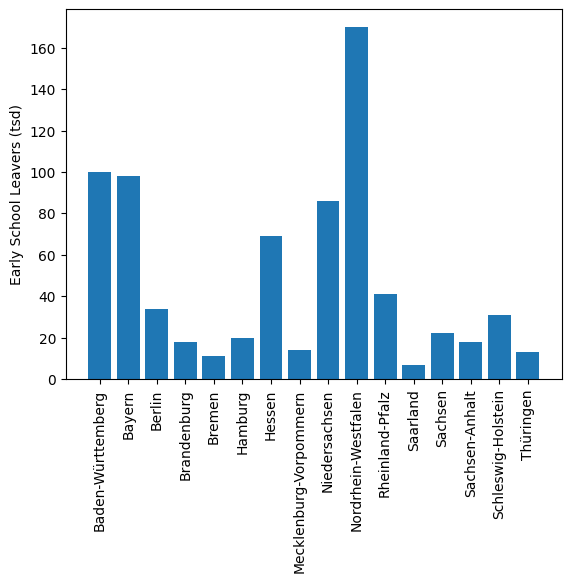

In [9]:
droppers_2022_str = df1.iloc[1:-1,-1]
droppers_2022 = pd.to_numeric(droppers_2022_str, errors='coerce')
federal_states_ = df1['year'][1:-1]
print(federal_states_)
plt.bar(federal_states_, droppers_2022)
plt.ylabel('Early School Leavers (tsd)')
plt.xticks(rotation=90)
plt.show()

The graph above illustrates school dropout rates in 2022. Among the federal states, "Nordrhein-Westfalen" recorded the highest number of school leavers, reaching 170,000. It was followed by Baden-Württemberg and Bayern, with 100,000 and 98,000 school leavers, respectively. On the other end, Saarland, Bremen, and Thüringen exhibited the lowest rates of school leaving, reporting only 7,000, 11,000, and 13,000 leavers, respectively.
Analyzing the overall trend of school leaving numbers across all federal states in Germany, a significant decline is observed in the period of 2005 to 2014. Subsequently, the rates remained relatively stable from 2015 to 2020. However, an abrupt increase was noted in 2021 and 2022, as illustrated in the graph below:

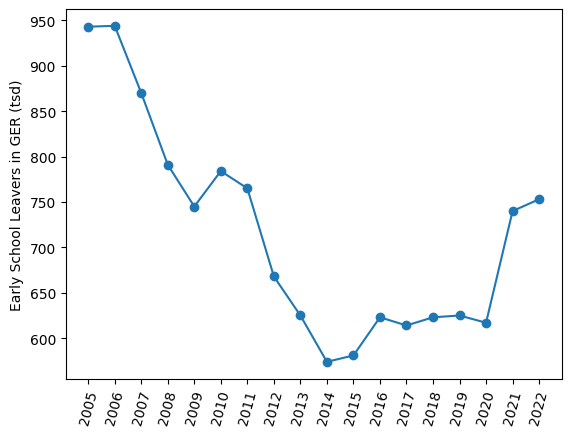

In [10]:
# Verlauf über die Jahren 2005-2022
years = df1.columns[1:]
general = df1.iloc[-1, 1:]
general_num = pd.to_numeric(general, errors='coerce')
plt.plot( years, general_num, marker='o')
plt.xticks(rotation=75)
plt.ylabel('Early School Leavers in GER (tsd)')
plt.show()

Focussing on the total crime rates, i.e. male and female crimes, in the year 2022, presented by the graph below, we notice that the federal state Nordrhein Westfalen again ranks first, followed by Bayern and Baden-Württemberg. 

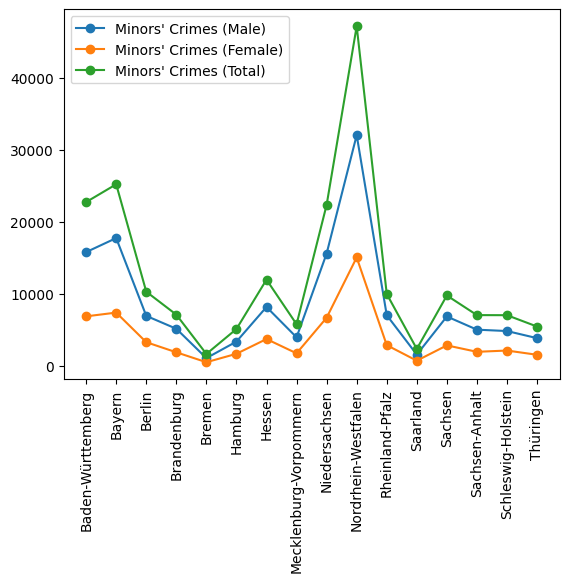

In [11]:
# Find the male criminal rate 
stop_idx = df2.index[df2['3']=='Thüringen'][0]+1
federal_states = df2['3'][1:stop_idx]
sum_teens = np.zeros(stop_idx -1)
for i in range(1, stop_idx):
    teens_under14_str = df2.iloc[i,9] 
    teens_14_18_str = df2.iloc[i, 12]
    teens_14_18 = pd.to_numeric(teens_14_18_str.replace(",", ""), errors='coerce')
    teens_under14 = pd.to_numeric(teens_under14_str.replace(",", ""), errors='coerce')
    sum_teens[i-1] = teens_14_18 + teens_under14
plt.plot(federal_states, sum_teens, marker='o', label='Minors\' Crimes (Male)')  
plt.xticks(rotation=90)         
#plt.show()  

sum_teens_f = np.zeros(stop_idx -1)
for j in range(stop_idx+1, 2*stop_idx):
    teens_under14_f_str = df2.iloc[j, 9]
    teens_14_18_f_str = df2.iloc[j, 12]
    teens_under14_f = pd.to_numeric(teens_under14_f_str.replace(",",""), errors='coerce')
    teens_14_18_f = pd.to_numeric(teens_14_18_f_str.replace(",",""), errors='coerce')
    sum_teens_f[j - stop_idx -1] = teens_under14_f + teens_14_18_f
plt.plot(federal_states, sum_teens_f, marker='o', label='Minors\' Crimes (Female)')
plt.xticks(rotation=90)
#plt.show()

#plot both male and female criminal rates
teens_all = np.zeros(stop_idx -1)
for k in range(stop_idx-1):
    teens_all[k] = sum_teens[k] + sum_teens_f[k]
plt.plot(federal_states, teens_all, marker='o', label='Minors\' Crimes (Total)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Additionally, the following pie chart illustrates the distribution of crimes, with a focus on offenses committed by different age groups. Among these, minors contribute to 17.9%, almost one-fifth of the total crimes. This proportion underscores the concerning impact of juvenile delinquency on the overall crime landscape.  

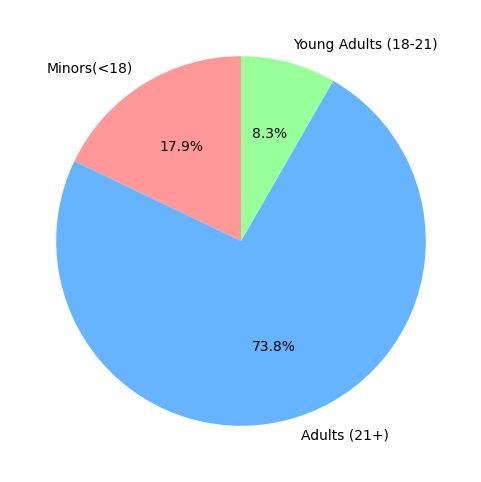

In [17]:
# get the Anteil of criminals under 18 years old
under_18 = 0
for l in range(len(teens_all)):
    under_18 += teens_all[l]

# criminals starting 21 yo 
starting_21_m_str = df2.iloc[stop_idx, -1]
starting_21_m = pd.to_numeric(starting_21_m_str.replace(",",""), errors='coerce')
starting_21_f_str = df2.iloc[2*stop_idx+1, -1]
starting_21_f = pd.to_numeric(starting_21_f_str.replace(",",""), errors='coerce')
starting_21 = starting_21_f + starting_21_m

# criminals between 18 yo and 21 yo
between_18_21_m_str = df2.iloc[stop_idx, 13]
between_18_21_m = pd.to_numeric(between_18_21_m_str.replace(",",""), errors='coerce')
between_18_21_f_str = df2.iloc[2*stop_idx+1, 13]
between_18_21_f = pd.to_numeric(between_18_21_f_str.replace(",",""), errors='coerce')
between_18_21_all = between_18_21_f + between_18_21_m 

#plot the pie chart to visualize the parts
sizes = [under_18, starting_21, between_18_21_all]
categories = ['Minors(<18)', 'Adults (21+)', 'Young Adults (18-21)']
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(6, 6))

plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
plt.show()

Shifting our focus to the unemployment rates across the federal states, it is noteworthy that the highest rate of unemployment has been recorded in Nordrhein-Westfalen, followed by Bayern and Niedersachsen, which slightly overtook Baden-Württemberg in its unemployment figures.

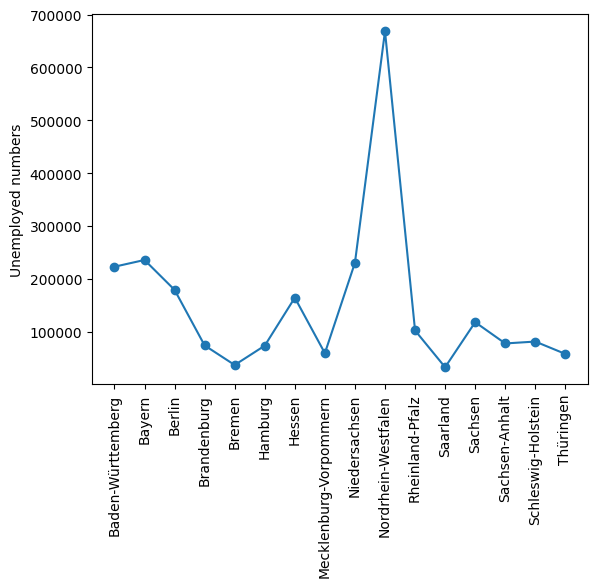

In [18]:
# Extract the numbers of unemployed in the different federal states in 2022
# and transform to numerical values
federal_states = df3.columns[1::3]
count_2022 = df3.iloc[-1, 1::3]
count_2022 = pd.to_numeric(count_2022, errors='coerce')  # 'coerce' will replace non-numeric values with NaN

plt.plot(federal_states, count_2022, marker='o')
plt.xticks(rotation=90)
plt.ylabel('Unemployed numbers')
# Show the plot
plt.show()

Having examined the contemporary unemployment rates in the federal states for the year 2022, delving into the trend spanning from 2011 to 2022 offers a comprehensive understanding of the evolving employment dynamics over the past decade. 

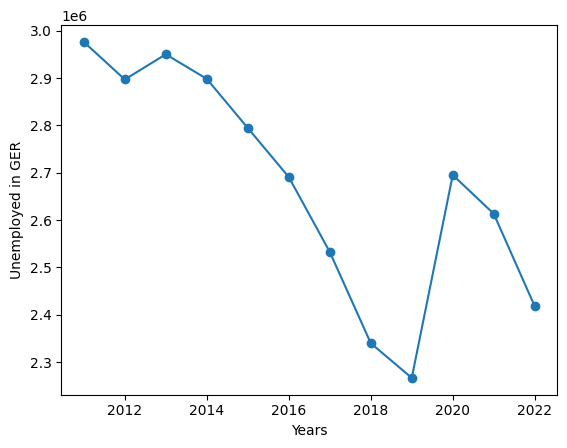

In [100]:
sum_values = np.zeros(12)
index = 0
for i in range(-1, -13, -1):
    count_2022_2011 = df3.iloc[i, 1::3]
    count_2022_2011 = pd.to_numeric(count_2022_2011, errors='coerce')  
    sum_values[index] = count_2022_2011.sum()
    index += 1

rows_val = df3.iloc[-1:-13:-1]
#print(rows_val)
#plt.bar(df3['Years'][-1:-13:-1], sum_values)
plt.plot(df3['Years'][-1:-13:-1], sum_values, marker='o')
plt.xlabel('Years')
plt.ylabel('Unemployed in GER')
plt.show()

The presented plot illustrates a declining trend in unemployment numbers in Germany, reaching its lowest point in 2019. However, a sudden peaking at nearly 2.7e10 was noted, before once again receding to approximately 2.4e10. 

## 6. Conclusion

To conclude, the question of whether there exists a correlation between early school leaving rates and crime rates among young demographics in specific federal states in 2022 is addressed by analyzing graphs (1) and (3). The visual representations strongly suggest a high correlation between these two factors. Regarding the inquiry into whether noticeable correlations between unemployment rates and early school leaving rates across different federal states and years (especially in 2022) exist, a high correlation is also to suggest when examining the trends of the graphs (1) and (5) for the year 2022. However, this correlation is not so high for the evolution of both factors over the years, since the unemployment numbers relatively decrease after 2020 but the early school leaving decreases.

This project does provide valuable insights into a factor that has influenced crime and unemployment numbers but it is also to take into consideration that the crime numbers were only limited to German citizens and not migrants. Besides, other factors such as the Corona pandemic could have also an important impact on the unemployment and crime numbers, which has not been tackled in the scope of this project.  
